In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,label_binarize
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("processed.cleveland.data", header=None,na_values='?')
x=df.mean()#Returns column mean
df=df.fillna(x)
X=df.iloc[:,0:13]
Y=df.iloc[:,13]
S=StandardScaler()
X_scaled=S.fit_transform(X)
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,train_size=0.6)

In [ ]:
train_accuracy=np.zeros(95)
test_accuracy=np.zeros(95)
j=0
for i in range(50,1000,10):
    mymod=MLPClassifier(hidden_layer_sizes=(128,64,64,32),activation='relu', solver='sgd',max_iter=i)
    mymod.fit(X_train,Y_train)
    Y_pred_train=mymod.predict(X_train)
    Y_pred_test=mymod.predict(X_test)
    train_accuracy[j]=accuracy_score(Y_train,Y_pred_train)
    test_accuracy[j]=accuracy_score(Y_test,Y_pred_test)
    j=j+1

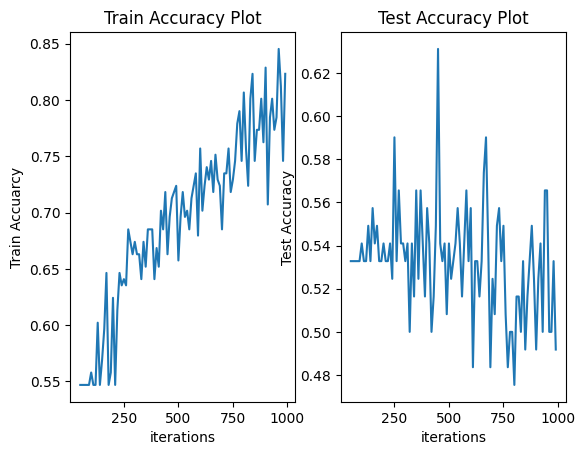

In [4]:
iter=list(range(50,1000,10))
#print(train_accuracy)
#print(test_accuracy)
#print(j)
plt.subplot(1,2,1)
plt.plot(iter,train_accuracy)
plt.title("Train Accuracy Plot")
plt.xlabel("iterations")
plt.ylabel("Train Accuarcy")
plt.subplot(1,2,2)
plt.plot(iter,test_accuracy)
plt.title("Test Accuracy Plot")
plt.xlabel("iterations")
plt.ylabel("Test Accuracy")
plt.show()

In [8]:
mymod=MLPClassifier(hidden_layer_sizes=(128,64,64,32),activation='relu', solver='sgd',max_iter=4000)
mymod.fit(X_train,Y_train)
Y_pred_train=mymod.predict(X_train)
Y_pred_test=mymod.predict(X_test)
print(f"Train Accuracy:{accuracy_score(Y_train,Y_pred_train)}")
print(f"Test Accuracy:{accuracy_score(Y_test,Y_pred_test)}")
print(f"Recall score:{recall_score(Y_test,Y_pred_test,average=None)}")
print(f"Precision score:{precision_score(Y_test,Y_pred_test,average=None)}")

Train Accuracy:0.988950276243094
Test Accuracy:0.4918032786885246
Recall score:[0.69230769 0.21052632 0.47058824 0.2        0.        ]
Precision score:[0.73770492 0.11764706 0.47058824 0.375      0.        ]


[[45 18  1  1  0]
 [11  4  4  0  0]
 [ 3  3  8  2  1]
 [ 1  6  4  3  1]
 [ 1  3  0  2  0]]


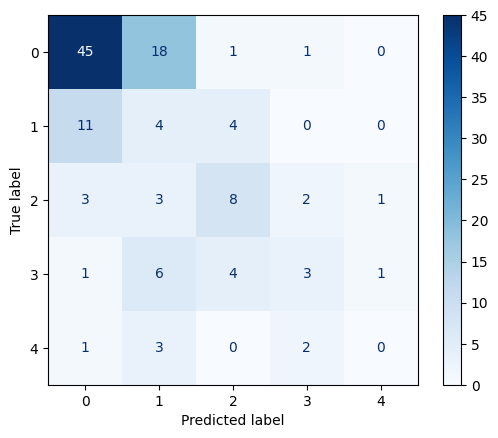

In [13]:
cm=confusion_matrix(Y_test,Y_pred_test)
print(cm)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

AUC Score:0.7081206621758429


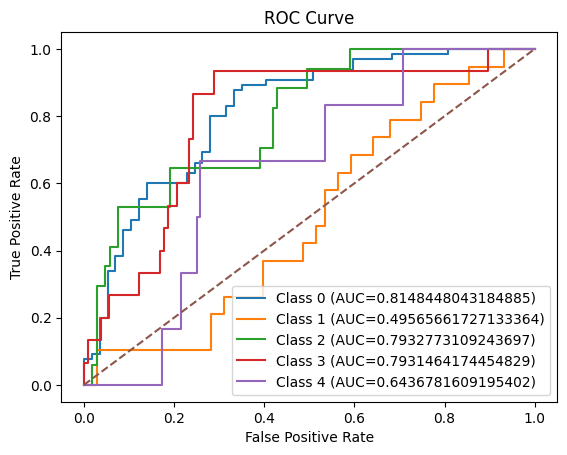

In [16]:
#To get ROC curve, we need probabilistic outputs from our classifier
Y_prob_test=mymod.predict_proba(X_test)
#print(Y_prob_test)
print(f"AUC Score:{roc_auc_score(Y_test,Y_prob_test,multi_class='ovr')}")
classes=np.unique(Y_test)
Y_test_encode=label_binarize(Y_test,classes=classes)
#print(Y_test_encode)
for i,cls in enumerate(classes):
    fpr,tpr,_=roc_curve(Y_test_encode[:,i],Y_prob_test[:,i])
    auc=roc_auc_score(Y_test_encode[:,i],Y_prob_test[:,i])
    plt.plot(fpr,tpr,label=f"Class {cls} (AUC={auc})")
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()